In [1]:
# Importing all the required Libraries

import pandas as pd
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the Dataset

df = pd.read_csv(r'D:\British Airways - Web Svrapping\Task 2\customer_booking.csv', encoding='iso-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
# Information about the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
# Description of the Dataset

df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
# Filling Null Values if Present

df = df.ffill()

In [8]:
# Encode the Categorical Variables
label_encoder = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoder[column] = le

In [9]:
# Feature matrix and target vector
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']


# Split the Dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train a machine learning model (Random Forest)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Evaluate the model with Confusion Matrix

y_pred = model.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[8395  125]
 [1313  167]]


In [12]:
# Evaluate the model with Classification Report

print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



In [13]:
# Evaluate the model with Accuracy Score

print("Accuracy Score: ")
print(accuracy_score(y_test, y_pred))

Accuracy Score: 
0.8562


In [14]:
# Evaluate the model with Cross- Validation

cv_score = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Score: ", cv_score)
print("Mean Cross-Validation Score: ", cv_score.mean())

Cross-Validation Score:  [0.851  0.4828 0.2464 0.3706 0.4996]
Mean Cross-Validation Score:  0.49008


In [15]:
# Feature Importance

feature_importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

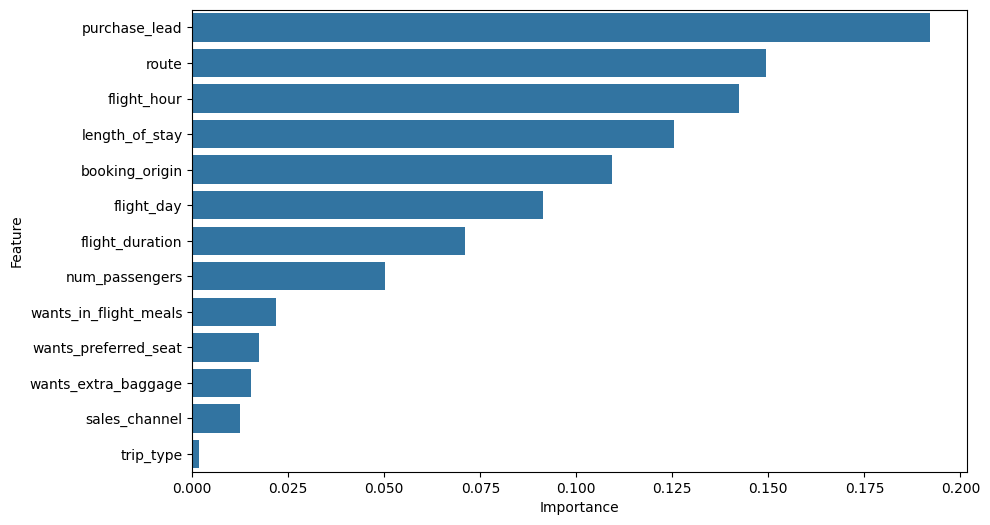

In [16]:
# Visualize Feature Importance

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.show()

In [17]:

# Encoding categorical variables
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [18]:

# Splitting features and target
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:

# Training RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:

# Cross-validation with ROC AUC
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-validated ROC AUC scores:", cv_scores)
print("Mean ROC AUC:", cv_scores.mean())

Cross-validated ROC AUC scores: [0.7598858  0.78956923 0.76217138 0.76261998 0.79911293]
Mean ROC AUC: 0.7746718626860447


In [22]:
from sklearn.metrics import roc_auc_score


# Model prediction and evaluation
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.13      0.21      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.86      0.82     10000

ROC AUC: 0.7843560065347037


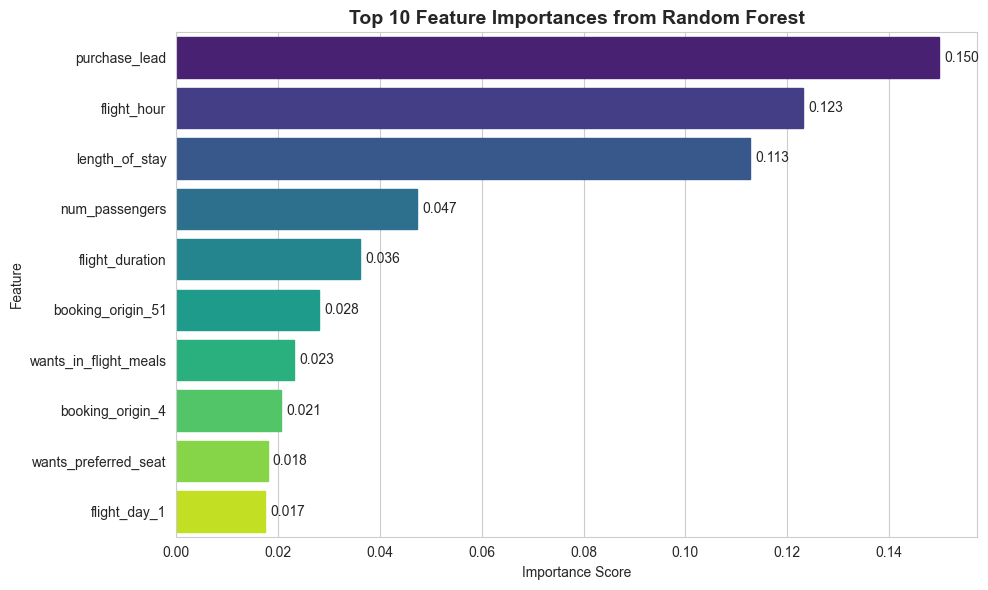

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and get top 10 features
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(10)

# Set style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create base barplot without color palette
barplot = sns.barplot(x=top_features.values, y=top_features.index)

# Assign custom colors manually to bars
colors = sns.color_palette("viridis", len(top_features))
for bar, color in zip(barplot.patches, colors):
    bar.set_color(color)

# Add exact values next to bars
for i, val in enumerate(top_features.values):
    plt.text(val + 0.001, i, f'{val:.3f}', va='center', ha='left', fontsize=10)

# Labels and title
plt.title('Top 10 Feature Importances from Random Forest', fontsize=14, weight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


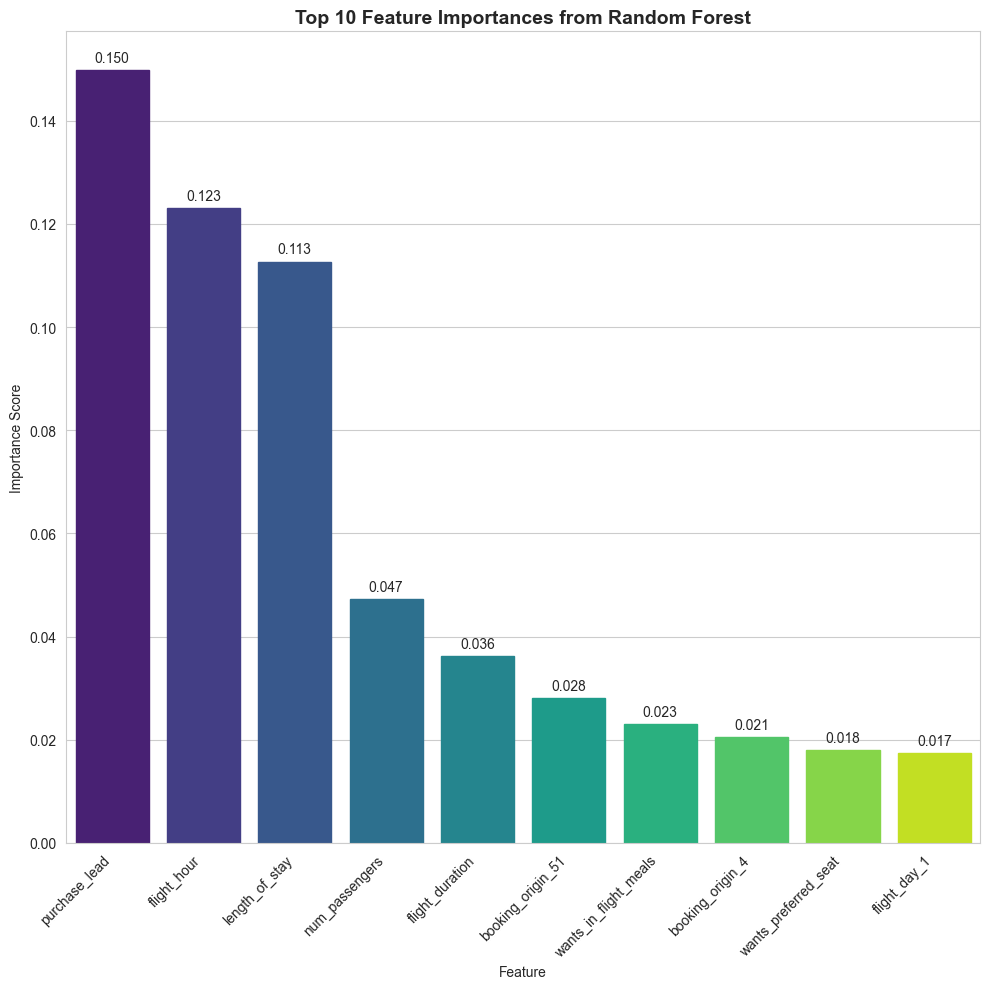

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and get top 10 features
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(10)

# Set style
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")

# Create base vertical barplot
barplot = sns.barplot(x=top_features.index, y=top_features.values)

# Assign custom colors manually to bars
colors = sns.color_palette("viridis", len(top_features))
for bar, color in zip(barplot.patches, colors):
    bar.set_color(color)

# Add value labels above bars
for i, val in enumerate(top_features.values):
    plt.text(i, val + 0.001, f'{val:.3f}', ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.title('Top 10 Feature Importances from Random Forest', fontsize=14, weight='bold')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()
